In [2]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


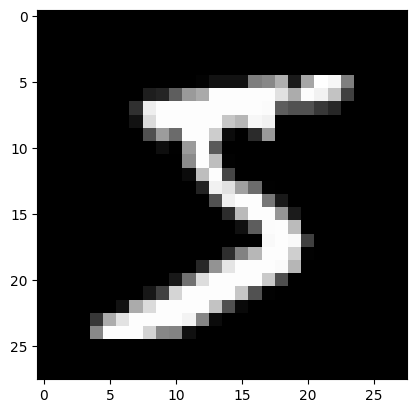

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [4]:
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [5]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [8]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential (Sequential)     (None, 32)                576480    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            577232    
                                                                 
Total params: 1153712 (4.40 MB)
Trainable params: 1153712 (4.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


----------- EPOCH 0 -----------
1/1 [==============================] - 0s 44ms/step


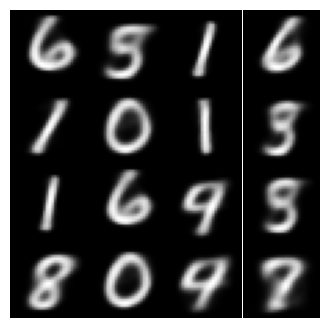

938/938 [==============================] - 26s 28ms/step - loss: 0.1900 - accuracy: 0.1563

----------- EPOCH 1 -----------
1/1 [==============================] - 0s 21ms/step


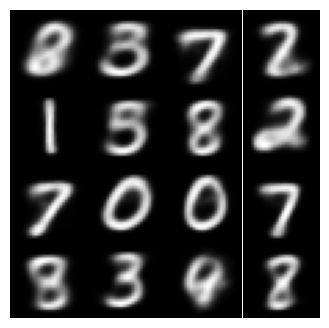

938/938 [==============================] - 27s 29ms/step - loss: 0.1899 - accuracy: 0.1565

----------- EPOCH 2 -----------
1/1 [==============================] - 0s 22ms/step


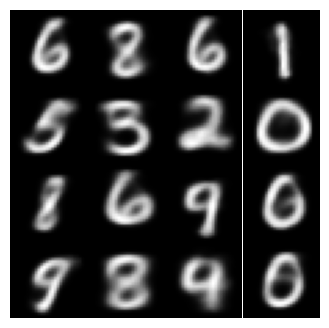

938/938 [==============================] - 27s 28ms/step - loss: 0.1895 - accuracy: 0.1567

----------- EPOCH 3 -----------
1/1 [==============================] - 0s 21ms/step


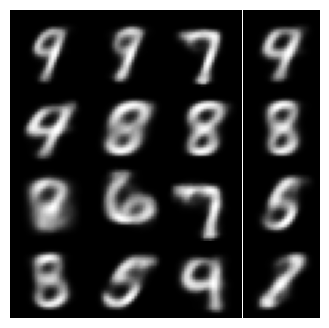

938/938 [==============================] - 27s 29ms/step - loss: 0.1892 - accuracy: 0.1578

----------- EPOCH 4 -----------
1/1 [==============================] - 0s 22ms/step


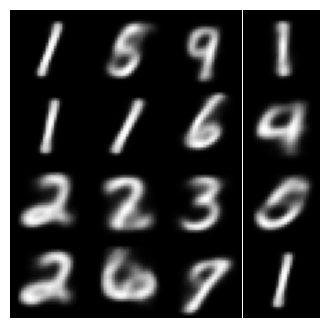

938/938 [==============================] - 27s 29ms/step - loss: 0.1890 - accuracy: 0.1574

----------- EPOCH 5 -----------
1/1 [==============================] - 0s 22ms/step


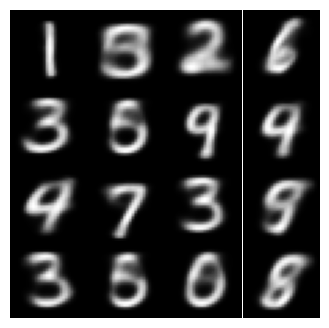

938/938 [==============================] - 28s 30ms/step - loss: 0.1887 - accuracy: 0.1579

----------- EPOCH 6 -----------
1/1 [==============================] - 0s 21ms/step


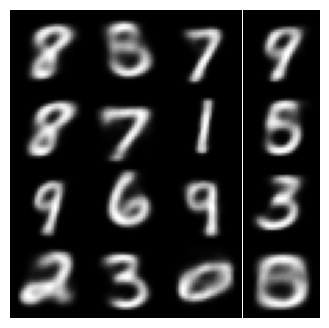

938/938 [==============================] - 28s 29ms/step - loss: 0.1888 - accuracy: 0.1583

----------- EPOCH 7 -----------
1/1 [==============================] - 0s 21ms/step


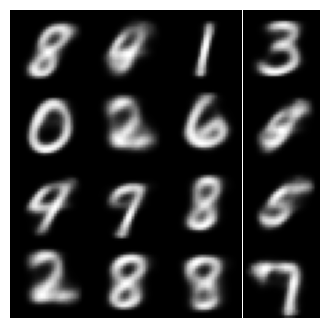

938/938 [==============================] - 28s 30ms/step - loss: 0.1886 - accuracy: 0.1585

----------- EPOCH 8 -----------
1/1 [==============================] - 0s 21ms/step


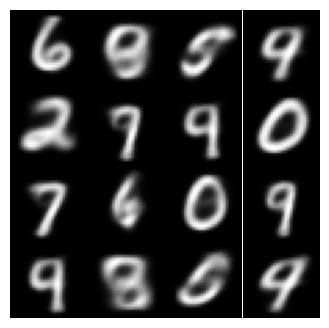

938/938 [==============================] - 28s 30ms/step - loss: 0.1884 - accuracy: 0.1587

----------- EPOCH 9 -----------
1/1 [==============================] - 0s 22ms/step


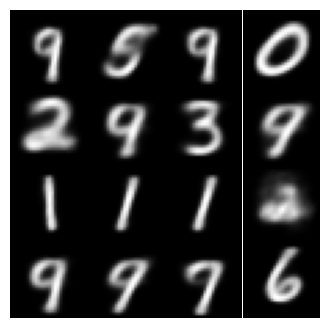

938/938 [==============================] - 29s 30ms/step - loss: 0.1882 - accuracy: 0.1595



In [13]:
EPOCHS = 10
#EPOCHS = 1000
for epoch in range(EPOCHS):
    print("-----------", "EPOCH", epoch, "-----------")
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

    #display.clear_output()

    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    model.fit(x_train, x_train, batch_size = 64)
    print()